In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f

In [38]:
fichero = open('irism.data')
lineas = fichero.read()
rows = lineas.split('\n')
data_array = []
sepalL = []
sepalW = []
petalL = []
petalW = []
classs = []

for i in range(0, len(rows) - 1):  # Recorrer todas las filas en lugar de solo las primeras 75
    values = rows[i].split(',')
    if len(values) == 5:  # Asegurarse de que cada fila tenga 5 valores
        data_array.append(values)

data_array = np.array(data_array)

for data in data_array:
    sepalL.append(float(data[0]))
    sepalW.append(float(data[1]))
    petalL.append(float(data[2]))
    petalW.append(float(data[3]))
    if data[4] == 'Iris-setosa':
        classs.append(0)
    elif data[4] == 'Iris-versicolor':
        classs.append(1)
    elif data[4] == 'Iris-virginica':
        classs.append(2)


In [39]:
df = pd.DataFrame(data_array, columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
print(df)

    sepal length sepal width petal length petal width class
0            5.4         3.4          1.7         0.2     1
1            5.1         3.7          1.5         0.4     1
2            4.6         3.6          1.0         0.2     1
3            5.1         3.3          1.7         0.5     1
4            4.8         3.4          1.9         0.2     1
..           ...         ...          ...         ...   ...
144          6.7         3.3          5.7         2.5     3
145          6.7         3.0          5.2         2.3     3
146          6.3         2.5          5.0         1.9     3
147          6.5         3.0          5.2         2.0     3
148          6.2         3.4          5.4         2.3     3

[149 rows x 5 columns]


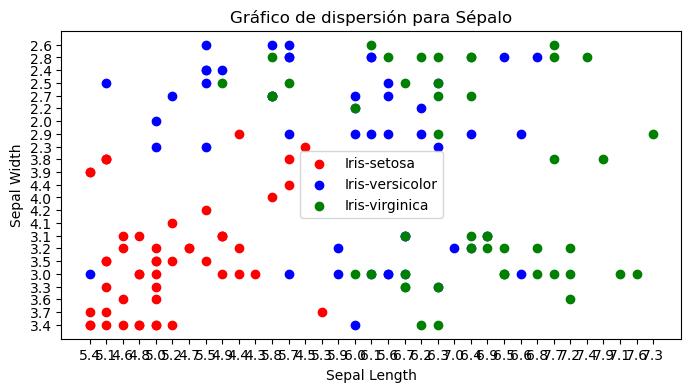

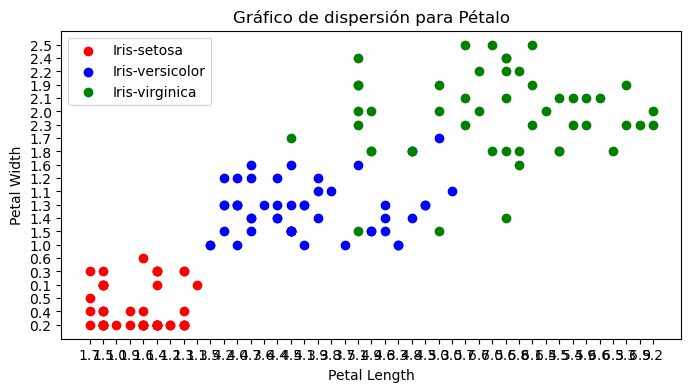

In [40]:
sepal_length = data_array[:, 0]
sepal_width = data_array[:, 1]
petal_length = data_array[:, 2]
petal_width = data_array[:, 3]
class_labels = data_array[:, 4]

unique_classes = np.unique(class_labels)
colors = ['red', 'blue', 'green']
clases = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


plt.figure(figsize=(8, 4))
for i, class_label in enumerate(unique_classes):
    class_indices = np.where(np.array(class_labels) == class_label)
    plt.scatter(np.array(sepal_length)[class_indices], np.array(sepal_width)[class_indices], color=colors[i], label=clases[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Gráfico de dispersión para Sépalo')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
for i, class_label in enumerate(unique_classes):
    class_indices = np.where(np.array(class_labels) == class_label)
    plt.scatter(np.array(petal_length)[class_indices], np.array(petal_width)[class_indices], color=colors[i], label=clases[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Gráfico de dispersión para Pétalo')
plt.legend()
plt.show()


In [41]:
petal_length = np.array([float(x) for x in petal_length])
petal_width = np.array([float(x) for x in petal_width])
sepal_length = np.array([float(x) for x in sepal_length])
sepal_width = np.array([float(x) for x in sepal_width])

media_sepal_length = np.mean(sepal_length)
media_sepal_width = np.mean(sepal_width)
media_petal_length = np.mean(petal_length)
media_petal_width = np.mean(petal_width)


varianza_sepal_length = np.var(sepal_length)
varianza_sepal_width = np.var(sepal_width)
varianza_petal_length = np.var(petal_length)
varianza_petal_width = np.var(petal_width)


desviacion_sepal_length = np.std(sepal_length)
desviacion_sepal_width = np.std(sepal_width)
desviacion_petal_length = np.std(petal_length)
desviacion_petal_width = np.std(petal_width)


resultados = {
    'Característica': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
    'Media': [media_sepal_length, media_sepal_width, media_petal_length, media_petal_width],
    'Varianza': [varianza_sepal_length, varianza_sepal_width, varianza_petal_length, varianza_petal_width],
    'Desviación Estándar': [desviacion_sepal_length, desviacion_sepal_width, desviacion_petal_length, desviacion_petal_width]
}

df = pd.DataFrame(resultados)
print(df)

  Característica     Media  Varianza  Desviación Estándar
0   Sepal Length  5.842953  0.685672             0.828053
1    Sepal Width  3.054362  0.187984             0.433572
2   Petal Length  3.749664  3.101023             1.760972
3    Petal Width  1.194631  0.579971             0.761558


In [42]:
def pearson(datos1, media1, datos2, media2, des1, des2):
    return (sum((datos1-media1)*(datos2-media2))/(len(datos1)-1))/(des1*des2)

print('Pearson Sepal Length-Sepal Width')
print(pearson(sepal_length, media_sepal_length, sepal_width, media_sepal_width, desviacion_sepal_length, desviacion_sepal_width))
print()
print('Pearson Sepal Length-Petal Length')
print(pearson(sepal_length, media_sepal_length, petal_length, media_petal_length, desviacion_sepal_length, desviacion_petal_length))
print()
print('Pearson Sepal Length-Petal Width')
print(pearson(sepal_length, media_sepal_length, petal_width, media_petal_width, desviacion_sepal_length, desviacion_petal_width))
print()
print('Pearson Sepal Width-Petal Length')
print(pearson(sepal_width, media_sepal_width, petal_length, media_petal_length, desviacion_sepal_width, desviacion_petal_length))
print()
print('Pearson Sepal Width-Petal Width')
print(pearson(sepal_width, media_sepal_width, petal_width, media_petal_width, desviacion_sepal_width, desviacion_petal_width))
print()
print('Pearson Petal Length-Petal Width')
print(pearson(petal_length, media_petal_length, petal_width, media_petal_width, desviacion_petal_length, desviacion_petal_width))


Pearson Sepal Length-Sepal Width
-0.11005776761001027

Pearson Sepal Length-Petal Length
0.8790222389371282

Pearson Sepal Length-Petal Width
0.8248584898791047

Pearson Sepal Width-Petal Length
-0.42356332216711046

Pearson Sepal Width-Petal Width
-0.3590583345251141

Pearson Petal Length-Petal Width
0.9691123883761975


In [43]:
def mediaC(indices):
    mediaLS = np.mean(np.array(sepal_length)[indices])
    mediaWS = np.mean(np.array(sepal_width)[indices])
    mediaLP = np.mean(np.array(petal_length)[indices])
    mediaWP = np.mean(np.array(petal_width)[indices])
    return [ mediaLS, mediaWS, mediaLP, mediaWP,]

medias_list = []

for i, class_label in enumerate(unique_classes):
    class_indices = np.where(np.array(class_labels) == class_label)
    medias = mediaC(class_indices)
    
    medias_list.append(medias)

medias_array = np.array(medias_list)

print('Medias')
df = pd.DataFrame(medias_array, columns=['sepal length', 'sepal width', 'petal length', 'petal width'], index=['setosa', 'versicolor', 'virginica'])
print(df)


Medias
            sepal length  sepal width  petal length  petal width
setosa          5.006000     3.418000      1.464000     0.244000
versicolor      5.936000     2.770000      4.260000     1.326000
virginica       6.602041     2.973469      5.561224     2.030612


In [44]:
indices_por_clase = []
for i, class_label in enumerate(unique_classes):
    class_indices = np.where(np.array(class_labels) == class_label)
    indices_por_clase.append(class_indices)
    
SetosaSepalL = np.array(sepal_length)[indices_por_clase[0]].astype(float)
SetosaSepalW = np.array(sepal_width)[indices_por_clase[0]].astype(float)
SetosaPetalL = np.array(petal_length)[indices_por_clase[0]].astype(float)
SetosaPetalW = np.array(petal_width)[indices_por_clase[0]].astype(float)

VersiSepalL = np.array(sepal_length)[indices_por_clase[1]].astype(float)
VersiSepalW = np.array(sepal_width)[indices_por_clase[1]].astype(float)
VersiPetalL = np.array(petal_length)[indices_por_clase[1]].astype(float)
VersiPetalW = np.array(petal_width)[indices_por_clase[1]].astype(float)

VirgiSepalL = np.array(sepal_length)[indices_por_clase[2]].astype(float)
VirgiSepalW = np.array(sepal_width)[indices_por_clase[2]].astype(float)
VirgiPetalL = np.array(petal_length)[indices_por_clase[2]].astype(float)
VirgiPetalW = np.array(petal_width)[indices_por_clase[2]].astype(float)


In [45]:
mediaGsepalL = np.mean(medias_array[:,0])
mediaGsepalW = np.mean(medias_array[:,1])
mediaGpetalL = np.mean(medias_array[:,2])
mediaGpetalW = np.mean(medias_array[:,3])


In [51]:
alpha = 0.05
#Sepal Length
mean_1 = np.mean(SetosaSepalL)
mean_2 = np.mean(VirgiSepalL)
mean_3 = np.mean(VersiSepalL)

ss_between = (
    len(SetosaSepalL) * (mean_1 - mediaGsepalL)**2 +
    len(VirgiSepalL) * (mean_2 - mediaGsepalL)**2 +
    len(VersiSepalL) * (mean_3 - mediaGsepalL)**2
)

# Calcular la suma de los cuadrados dentro de las clases
ss_within = (
    np.sum((SetosaSepalL - mean_1)**2) +
    np.sum((VirgiSepalL - mean_2)**2) +
    np.sum((VersiSepalL - mean_3)**2)
)

# Calcular los grados de libertad
df_between = 2  # Número de clases - 1
df_within = len(data_array) - 3  # Número total de observaciones - Número de clases

# Calcular la estadística F
f_statistic = (ss_between / df_between) / (ss_within / df_within)

# Calcular el valor p utilizando la distribución F
p_value = 1 - f.cdf(f_statistic, df_between, df_within)

print("ANOVA para sepal length:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.\n")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.\n")

#Sepal Width
mean_1 = np.mean(SetosaSepalW)
mean_2 = np.mean(VirgiSepalW)
mean_3 = np.mean(VersiSepalW)

ss_between = (
    len(SetosaSepalW) * (mean_1 - mediaGsepalW)**2 +
    len(VirgiSepalW) * (mean_2 - mediaGsepalW)**2 +
    len(VersiSepalW) * (mean_3 - mediaGsepalW)**2
)

ss_within = (
    np.sum((SetosaSepalW - mean_1)**2) +
    np.sum((VirgiSepalW - mean_2)**2) +
    np.sum((VersiSepalW - mean_3)**2)
)

df_between = 2
df_within = len(data_array) - 3

f_statistic = (ss_between / df_between) / (ss_within / df_within)

p_value = 1 - f.cdf(f_statistic, df_between, df_within)

print("ANOVA para sepal width:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.\n")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.\n")

#Petal Width
mean_1_width = np.mean(SetosaPetalW)
mean_2_width = np.mean(VirgiPetalW)
mean_3_width = np.mean(VersiPetalW)

ss_between_width = (
    len(SetosaPetalW) * (mean_1_width - mediaGpetalW)**2 +
    len(VirgiPetalW) * (mean_2_width - mediaGpetalW)**2 +
    len(VersiPetalW) * (mean_3_width - mediaGpetalW)**2
)

ss_within_width = (
    np.sum((SetosaPetalW - mean_1_width)**2) +
    np.sum((VirgiPetalW - mean_2_width)**2) +
    np.sum((VersiPetalW - mean_3_width)**2)
)

df_between_width = 2  # Número de clases - 1
df_within_width = len(data_array) - 3  # Número total de observaciones - Número de clases

f_statistic_width = (ss_between_width / df_between_width) / (ss_within_width / df_within_width)

p_value_width = 1 - f.cdf(f_statistic_width, df_between_width, df_within_width)

print("ANOVA para petal width:")
print(f"F-statistic: {f_statistic_width}")
print(f"P-value: {p_value_width}")
if p_value_width < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos (clases) para petal width.\n")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos (clases) para petal width.\n")


#petal Length
mean_1_length = np.mean(SetosaPetalL)
mean_2_length = np.mean(VirgiPetalL)
mean_3_length = np.mean(VersiPetalL)

ss_between_length = (
    len(SetosaPetalL) * (mean_1_length - mediaGpetalL)**2 +
    len(VirgiPetalL) * (mean_2_length - mediaGpetalL)**2 +
    len(VersiPetalL) * (mean_3_length - mediaGpetalL)**2
)

ss_within_length = (
    np.sum((SetosaPetalL - mean_1_length)**2) +
    np.sum((VirgiPetalL - mean_2_length)**2) +
    np.sum((VersiPetalL - mean_3_length)**2)
)

df_between_length = 2  # Número de clases - 1
df_within_length = len(data_array) - 3  # Número total de observaciones - Número de clases

f_statistic_length = (ss_between_length / df_between_length) / (ss_within_length / df_within_length)

p_value_length = 1 - f.cdf(f_statistic_length, df_between_length, df_within_length)

print("ANOVA para petal length:")
print(f"F-statistic: {f_statistic_length}")
print(f"P-value: {p_value_length}")
if p_value_length < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos (clases) para petal length.\n")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos (clases) para petal length.\n")



ANOVA para sepal length:
F-statistic: 120.85784637198469
P-value: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

ANOVA para sepal width:
F-statistic: 47.03472064440141
P-value: 2.220446049250313e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.

ANOVA para petal width:
F-statistic: 957.2446660595222
P-value: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos (clases) para petal width.

ANOVA para petal length:
F-statistic: 1175.7786540959125
P-value: 1.1102230246251565e-16
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos (clases) para petal length.

